In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
df = pd.read_csv('auto-mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [42]:
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [43]:
#remove the ?

df = df.replace('?',np.nan)
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [45]:
# Convert numeric col to float
numeric_cols = ["mpg","horsepower",'weight',"acceleration"]
df[numeric_cols] = df[numeric_cols].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [46]:
#Drop rows with missing numeric values

df = df.dropna(subset=numeric_cols)

In [48]:
#Clean the column name

df.columns = df.columns.str.strip()
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

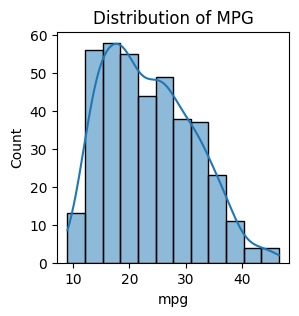

In [49]:
#Distribution Of MP
plt.figure(figsize=(3,3))
sns.histplot(df['mpg'],kde = True)
plt.title('Distribution of MPG')
plt.show()

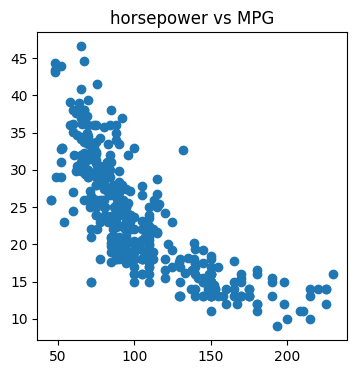

In [50]:
#scatter plot

plt.figure(figsize=(4,4))
plt.scatter(df['horsepower'],df['mpg'])
plt.title('horsepower vs MPG')
plt.show()

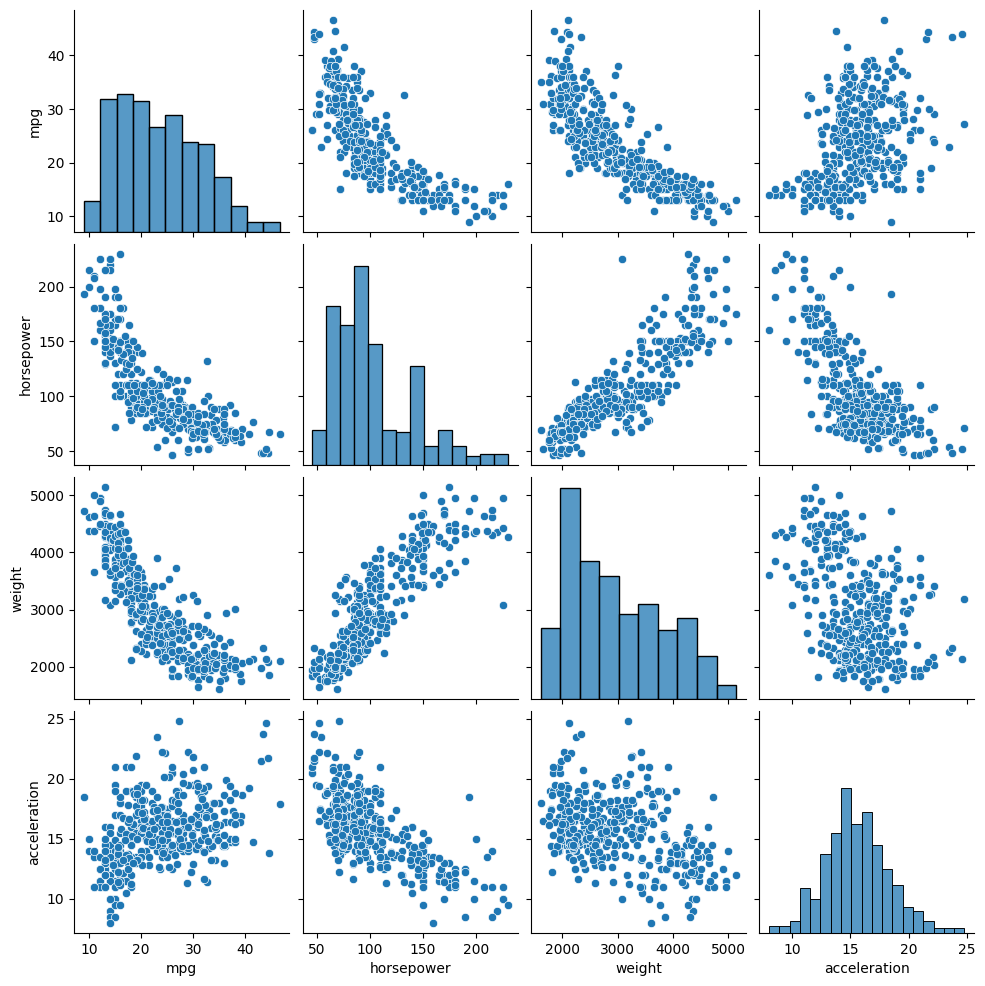

In [51]:
#pairplot
sns.pairplot(df[['mpg', 'horsepower', 'weight', 'acceleration']])
plt.show()

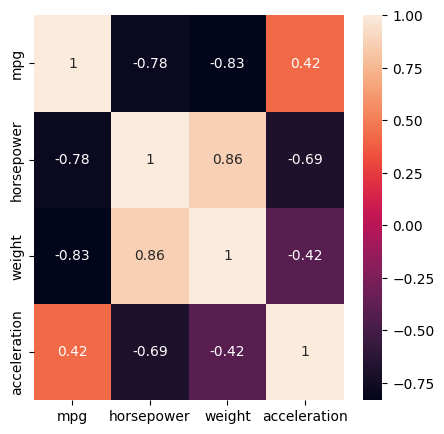

In [52]:
#Correlation HeatMap
plt.figure(figsize=(5,5))
sns.heatmap(df[["mpg","horsepower",'weight',"acceleration"]].corr(),annot=True)
plt.show()

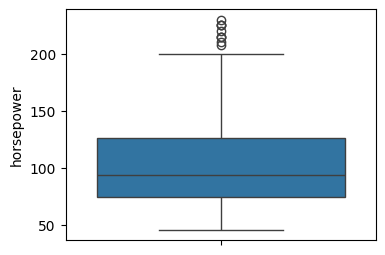

In [53]:
# Cheak for outliers

plt.figure(figsize=(4,3))
sns.boxplot(df["horsepower"])
plt.show()

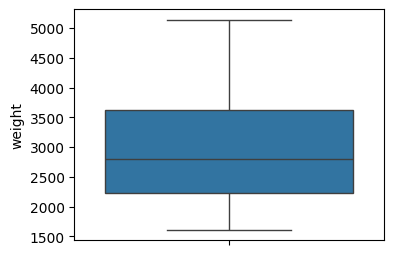

In [54]:
plt.figure(figsize=(4,3))
sns.boxplot(df["weight"])
plt.show()

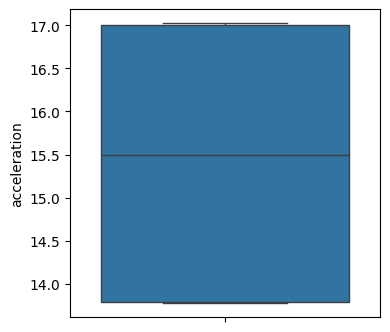

In [69]:
plt.figure(figsize=(4,4))
sns.boxplot(df["acceleration"])
plt.show()

In [57]:
# Outlier Detection (IQR)

Q1 = df['horsepower'].quantile(0.25)
Q3 = df['horsepower'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Horsepower Outliers:")
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Horsepower Outliers:
Lower Bound: -1.5
Upper Bound: 202.5


In [58]:
Q1 = df['acceleration'].quantile(0.25)
Q3 = df['acceleration'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Acceleration Outliers:")
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Acceleration Outliers:
Lower Bound: 8.900000000000002
Upper Bound: 21.899999999999995


In [59]:
Q1 = df["weight"].quantile(0.25)
Q3 = df["weight"].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Weight Outliers:")
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Weight Outliers:
Lower Bound: 141.0
Upper Bound: 5699.0


In [70]:
#Remove Outliers
# Clip
for i in df.columns[:-1]:
  df_clean[i] = df[i].clip(lower=df[i].quantile(0.25),upper=df[i].quantile(0.75))

In [61]:
# Regression BEFORE outlier removal

X = df[["horsepower",'acceleration',"weight"]]
Y = df["mpg"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [62]:
model_before = LinearRegression()
model_before.fit(X_train,Y_train)
pred_before = model_before.predict(X_test)

In [63]:
print(f"MSE: {mean_squared_error(Y_test,pred_before)}")
print(f"R2: {r2_score(Y_test,pred_before)}")

MSE: 17.81281501546555
R2: 0.6510068285906108


In [71]:
#Regression AFTER outlier removal

x = df_clean[['acceleration',"weight",'horsepower']]
y = df_clean["mpg"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [72]:
model_after = LinearRegression()
model_after.fit(x_train,y_train)
pred_after = model_after.predict(x_test)

In [74]:
print(f"MSE: {mean_squared_error(y_test,pred_after)}")
print(f"R2: {r2_score(y_test,pred_after)}")

MSE: 4.982115230991588
R2: 0.765215739748855


In [75]:
import pickle

In [76]:
with open("model_after.pkl","wb") as f:
    pickle.dump(model_after,f)